In [1]:
// Load the Sylvia libraries
#load "Include.fsx" 

In [2]:
<!-- Needed for VS Code and notebook environments without builtin LaTeX support -->
<script id="MathJax-script" src="https://cdn.jsdelivr.net/npm/mathjax@4/tex-mml-chtml.js"></script>

<!-- Needed for VS Code and notebook environments without builtin LaTeX support -->

In [3]:
// Open the Sylvia and Giant namespaces
open Sylvia
open Sylvia.GenAI.Giant

In [4]:
// Create a new LLM session
let llm = new LLMSession()

[Axiom] T = F = F.
[Axiom] T = F = F.
[Lemma] F = F = T.
[Lemma] ¬F = T:


## SMT Solver

In [5]:
// Solve a set of integer constraints using the LLM
llm.Solve "Find an integer x such that x > 5 and x <> 6 and x < 8"

LLM Intuition The integer satisfying the conditions $x > 5$, $x \neq 6$, and $x < 8$ is $x = 7$. 
 SMT Solver Result x = 7

In [5]:
// Solve another set of integer constraints using the LLM
llm.Solve "Find an integer x such that x > 5 and x <> 6 and x <> 7 and x < 8"

LLM Intuition No such integer exists. 
 Reasoning: 
The problem asks for an integer $x$ satisfying: 
 
 $x > 5$ 
 $x < 8$ 
 $x \neq 6$ 
 $x \neq 7$ 
 
 The integers strictly between 5 and 8 are the set ${6, 7}$.
The conditions $x \neq 6$ and $x \neq 7$ exclude both possibilities.
Therefore, the set of solutions is empty. 
 Formal Verification: 
I used the SMT solver to check for a model satisfying these constraints. The solver returned UNSAT (Unsatisfiable). 
 SMT Solver Result UNSATISFIABLE

In [6]:
// Solve a boolean formula
let r = llm.Solve "Find a propositional model for Tie || Shirt and not Tie || Shirt and not Tie || not Shirt"

// The variable r is of type LLMModel and has both natural language text generated by the LLM and a Z3 model:
r

LLM Intuition The propositional model satisfying the constraints is: 
 $$ \text{Tie} = \text{False} $$
$$ \text{Shirt} = \text{True} $$ 
 Verification: 
 
 Tie $\lor$ Shirt: $\text{False} \lor \text{True} \rightarrow \text{True}$ 
 $\neg$ Tie $\lor$ Shirt: $\neg \text{False} \lor \text{True} \rightarrow \text{True} \lor \text{True} \rightarrow \text{True}$ 
 $\neg$ Tie $\lor$ $\neg$ Shirt: $\neg \text{False} \lor \neg \text{True} \rightarrow \text{True} \lor \text{False} \rightarrow \text{True}$ 
 
 SMT Solver Result Shirt = true Tie = false

In [ ]:
// r has a Text property that contains the natural language text generated by the LLM:
r.Text

In [ ]:
// An a standard Z3.Model with the output of the SMT solver:
r.Model.Value

## Theorem Proving

In [12]:
// Prove a simple formula in propositional calculus
llm.Prove "Prove the formula p or q = q or p"

[Axiom] p or q = q or p.
Proof log level is 0. Only necessary output will be printed.
Proof of p or q = q or p:
|- p or q = q or p. [Axiom of Commutativity]
Proof complete.


LLM Intuition The formula p ||| q = q ||| p is proven. 
 Proof Details: 
 
 Theory: prop_calculus 
 Rule Application: The proof directly cites the Axiom of Commutativity (via the commute_or rule), which states that the logical OR operator is commutative. 
 Conclusion: |- p or q = q or p . 
 
 Formal Proof Proof log level is 0. Only necessary output will be printed.
Proof of p or q = q or p:
|- p or q = q or p. [Axiom of Commutativity]
Proof complete.

In [ ]:
// p has type LLMProof which combines both the intuition of the LLM with a formal proof using the Sylvia theorem prover
p

In [ ]:
llm.Prove "Prove the theorem (p ==> q == (-p + q))"

In [13]:
llm.Solve "Find a real number that satisfies x > 4 and x < 9."

LLM Intuition The real number 5 satisfies the condition $4 < x < 9$. 
 Symbolic Verification: 
 
 Variable Definition: Introduced a real variable y (since x was previously defined as an integer). 
 SMT Solver: Submitted constraints y > 4 and y < 9 . 
 Result: The solver returned the model y = 5 . 
 
 SMT Solver Result x = 5

In [ ]:
let p2 = llm.Prove "Find a proof of the formula (p and q)  ==> (p and (q or r))"

In [ ]:
p2


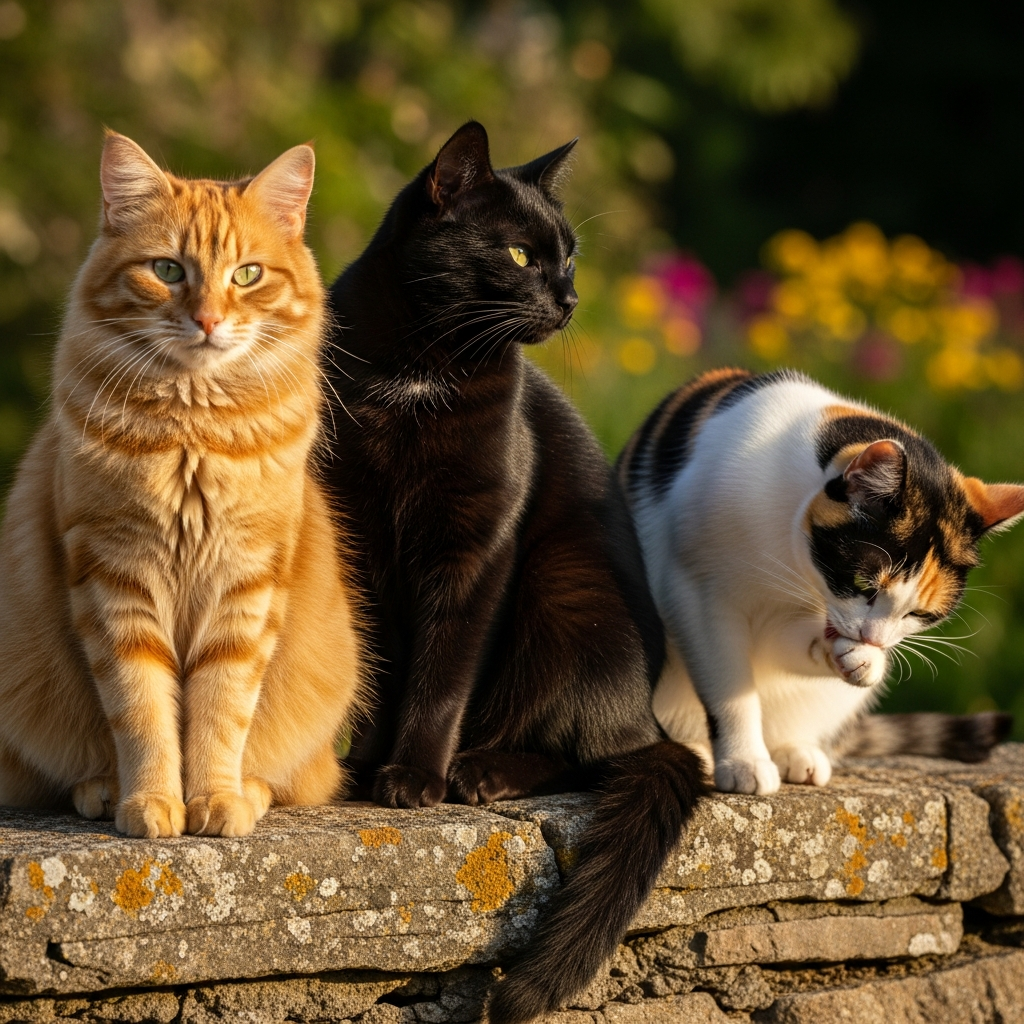

In [7]:
open Sylvia.GenAI.Gemini
let ig = new ImageGenerator()

let img = ig.Prompt("3 cats sitting on a wall.")
img

In [8]:
llm.Solve("Determine if the number of cats in the picture is divisible by integer 2", img)

LLM Intuition Based on the image provided: 
 
 Count: There are 3 cats visible in the picture (an orange tabby, a black cat, and a calico cat). 
 Verification: We want to determine if the integer 3 is divisible by 2. This is true if and only if there exists an integer $k$ such that $3 = 2k$. 
 
 I formulated this as a constraint satisfaction problem: 
 
 Variable: $k \in \mathbb{Z}$ 
 Constraint: $3 = 2k$ 
 
 Symbolic Result: 
The SMT solver returned UNSATISFIABLE , meaning no such integer $k$ exists. 
 Conclusion: 
The number of cats is 3 , which is not divisible by 2 . 
 $$ 3 \pmod 2 \neq 0 $$ 
 SMT Solver Result UNSATISFIABLE